In [1]:
import mylibrary.nnlib as nn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Least squares

In [3]:
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
    c = (sy*sx2 - sx*sxy)/z
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [4]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= 2.5*x + 0.5
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
# x = x + 0.5

In [5]:
n = len(x)

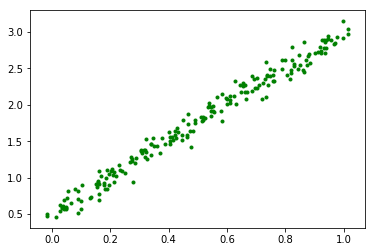

In [6]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [35]:
m = np.random.exponential()*2
c = np.random.randn()
print(m,c)
mt, mr = np.copy(m), np.copy(m)
ct, cr = np.copy(c), np.copy(c)

1.8614864149765302 -0.6848874265641995


In [36]:
m, c = regression(x, y)
ytarg = m*x+c
learning_rate = 0.03

m, c

(2.4712336088240905, 0.5292156486019927)

In [37]:
import collections

In [38]:
%matplotlib tk
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1,2,2)

plt.ion()
fig.show()
fig.canvas.draw()

range_ = 500
losscurv = collections.deque(maxlen=range_)
dmcurv = collections.deque(maxlen=range_)
dccurv = collections.deque(maxlen=range_)
ccurv = collections.deque(maxlen=range_)
mcurv = collections.deque(maxlen=range_)



for step in range(1000000):
    # traditional first
    yt = mt*x + ct
    dyt = yt - y
    dct = dyt.mean()
    dmt = x.T.dot(dyt)/n
    
    yr = mr*x + cr
#     yr = mr*x + ct
    dyr = yr - y
    
    dcr = dyr.mean()
    dmr = (1/x).T.dot(dyr)/n
    
    losscurv.append((dyr**2).mean())
    dmcurv.append(dmr)
    dccurv.append(dcr)
    mcurv.append(mr)
    ccurv.append(cr)
    
    if step%10==0:
        print('_______________________')
        print("epoch trad, rev", step)
        print("m  c", m, c)
        print("mt mr", mt, mr)
        print("ct cr", ct, cr)
        print("Loss", (dyt**2).mean(), (dyr**2).mean())
        print("dm  ", dmt, dmr)
        print("dc  ", dct, dcr)

        ax.clear()
        ax1.clear()
        ax.scatter(x, y, marker='.', c='g', label='x,y')
        ax.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
        ax.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
        ax.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
    #     plt.plot(x, np.zeros_like(x), c='b', lw=1)
        ax1.plot(losscurv, label='error')
        ax1.plot(dmcurv, label='dm', color='r')
        ax1.plot(dccurv, label='dc', color='orange')
        ax1.plot(mcurv, label='m', color='m', marker='_')
        ax1.plot(ccurv, label='c', color='y', marker='_')
        
        
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")


    mt = mt - learning_rate*dmt
    ct = ct - learning_rate*dct
    mr = mr - learning_rate*dmr
    cr = cr - learning_rate*dcr
###     the revised version does not seem to require learning rate
#     mr = mr - dmr
#     cr = cr - dcr
    

    if (dyt**2).mean() < 0.0025:
        print('fitted to our expectation')
        plt.pause(10)
        break

_______________________
epoch trad, rev 0
m  c 2.4712336088240905 0.5292156486019927
mt mr 1.8614864149765302 1.8614864149765302
ct cr -0.6848874265641995 -0.6848874265641995
Loss 2.348249584606385 2.348249584606385
dm   -0.8106899065484241 8.20790969415399
dc   -1.518763435812993 -1.518763435812993


_______________________
epoch trad, rev 10
m  c 2.4712336088240905 0.5292156486019927
mt mr 2.0669340981031508 -1.548076964695244
ct cr -0.2997749592857101 -0.10035141015719436
Loss 1.0868540521389354 8.341524729355218
dm   -0.5495115586656207 17.066217372145246
dc   -1.030998974614784 -2.63781674196484


_______________________
epoch trad, rev 20
m  c 2.4712336088240905 0.5292156486019927
mt mr 2.2061651997456373 -10.853664095334072
ct cr -0.0383299064800325 1.037232468587877
Loss 0.5059536705267059 52.92483935335428
dm   -0.3722842497890753 68.9607059836749
dc   -0.6999870618585282 -6.149772147461926


_______________________
epoch trad, rev 30
m  c 2.4712336088240905 0.5292156486019927

/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in double_scalars
/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in square
/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)




_______________________
epoch trad, rev 50
m  c 2.4712336088240905 0.5292156486019927
mt mr 2.4074011429056292 nan
ct cr 0.34166898488061087 nan
Loss 0.0584989083445927 nan
dm   -0.11507043674246573 nan
dc   -0.21944057366294215 nan


_______________________
epoch trad, rev 60
m  c 2.4712336088240905 0.5292156486019927
mt mr 2.4364922717154807 nan
ct cr 0.39735005335980794 nan
Loss 0.03236878046639011 nan
dm   -0.07751350105397928 nan
dc   -0.1492241143131351 nan


_______________________
epoch trad, rev 70
m  c 2.4712336088240905 0.5292156486019927
mt mr 2.4560629858758185 nan
ct cr 0.435227746654832 nan
Loss 0.020333937728233237 nan
dm   -0.05203820630691688 nan
dc   -0.10156790806329027 nan


_______________________
epoch trad, rev 80
m  c 2.4712336088240905 0.5292156486019927
mt mr 2.4691763974142806 nan
ct cr 0.4610219456011427 nan
Loss 0.014790319364007853 nan
dm   -0.0347614864087533 nan
dc   -0.06922158927300273 nan


_______________________
epoch trad, rev 90
m  c 2.47123360

No handles with labels found to put in legend.


TclError: this isn't a Tk application

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
plt.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
plt.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
plt.legend()

In [ ]:
# Debugging
print('trad       rev')

In [ ]:
print(dmt, dmr)
print(dct, dcr)

In [ ]:
t, r = dyt, dyr
print('delta y')
print('min',t.min(), r.min())
print('max',t.max(), r.max())
print('mean',t.mean(), r.mean())
print('std',t.std(), r.std())

In [ ]:
et, er = dyt**2, dyr**2
print('squared error')
print('min',et.min(), er.min())
print('max',et.max(), er.max())
print('mean',et.mean(), er.mean())
print('std',t.std(), r.std())

In [ ]:
# it is sure to work for only one point,, for vector ??

In [ ]:
yr = mr*x + cr
dyr = yr - y
dcr = dyr.mean()
dcr # >0 means that the y-intercept should be decreased in value, shift it below

In [ ]:
dmr = (1/x).T.dot(dyr)/n

In [ ]:
dmr_ = np.zeros_like(x)
for i in range(len(x)):
    dmr_[i]=1/x[i]*dyr[i]
dmr_

In [ ]:
dmr_.mean(), dmr

In [ ]:
## The error is due to the dy(gradient) reaching to values where it 